# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [149]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [150]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [151]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [152]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [153]:
print(df_data.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1   

In [154]:
print(f"The shape of df_data is: {df_data.shape}")

The shape of df_data is: (962, 16)


In [155]:
print(f"These are the columns' names {df_data.columns.values}")

These are the columns' names ['year' 'category' 'prize' 'motivation' 'prize_share' 'laureate_type'
 'full_name' 'birth_date' 'birth_city' 'birth_country'
 'birth_country_current' 'sex' 'organization_name' 'organization_city'
 'organization_country' 'ISO']


In [156]:
print(f"The first Nobel Prize was awarded in {df_data.sort_values(by='year')['year'][0]}")

The first Nobel Prize was awarded in 1901


In [157]:
print(f"The latest year included in this dataset is {df_data.sort_values(by='year')['year'][-1:].values[0]}")

The latest year included in this dataset is 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [158]:
print(f"Are there any duplicate values in the dataset? {df_data.duplicated().any()}")

Are there any duplicate values in the dataset? False


### Check for NaN Values

In [159]:
print(f"Are there NaN values in the dataset?\nWhich columns tend to have NaN values?\n{df_data.isna().any()}")

Are there NaN values in the dataset?
Which columns tend to have NaN values?
year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool


In [160]:
print(f"How many NaN values are there per column?\n{df_data.isna().sum()}")

How many NaN values are there per column?
year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [161]:
col_subset = ["year", "category", "laureate_type", "birth_date", "full_name", "organization_name"]
print(f"Why do these columns have NaN values?\n{df_data.loc[df_data.birth_date.isna()][col_subset]}\n\nBeing an organization means you will not find birth_date and the organization_name will actually be placed in full_name")
print(f"It also happens with people who are not affiliated with an university\n{df_data.loc[df_data.organization_name.isna()][col_subset]}")

Why do these columns have NaN values?
     year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Or

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [162]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [163]:
split_value = df_data.prize_share.str.split("/", expand=True)
# As in the csv we have the prize_share as a string and it cannot be directly converted to numeric, we need to split it then transform the splited values in numeric again to calculate
df_data["share_pct"] = pd.to_numeric(split_value[0]) / pd.to_numeric(split_value[1])
print(df_data.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    I

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [164]:
genders = df_data.sex.value_counts()
fig = px.pie(df_data, values=genders.values, names=genders.index, title="Prize by gender relationship", hole=0.3)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [165]:
three_female_winners = df_data[df_data.sex == "Female"].sort_values(by="year")
three_female_winners[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [166]:
multiple_winners = df_data.duplicated(subset=["full_name"], keep=False)
winners = df_data[multiple_winners]
print(f"These are the ones who won more than once:\n{winners[['year', 'category', 'laureate_type', 'full_name']]}")

These are the ones who won more than once:
     year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                      

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [167]:
cat_count = df_data.category.value_counts()
fig = px.bar(cat_count, x=cat_count.index, y=cat_count.values, title="Prizes per category", labels={"index":"Categories", "y":"Prizes"}, color_continuous_scale="Aggrnyl", color=cat_count.values)
fig.update_coloraxes(showscale=False)
fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [168]:
first_economics_prize = df_data[df_data.category == "Economics"].sort_values(by="year").head(n=1)

In [169]:
print(f"The first Economics Nobel Prize was awarded in {first_economics_prize.year.values[0]} and it was for {first_economics_prize.full_name.values[0]}")

The first Economics Nobel Prize was awarded in 1969 and it was for Jan Tinbergen


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [170]:
cat_count_by_gender = df_data.groupby(["category", "sex"], as_index=False).agg({"prize": pd.Series.count})
cat_count_by_gender.sort_values("prize", ascending=False, inplace=True)
fig = px.bar(x=cat_count_by_gender.category, y=cat_count_by_gender.prize, title="Prizes per category. Men vs Women", labels={"index":"Categories", "y":"Prizes"}, color_continuous_scale="Aggrnyl", color=cat_count_by_gender.sex)
fig.update_coloraxes(showscale=False)
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [191]:
prizes_by_year = df_data.groupby(by=["year"])["prize"].count()

In [192]:
print(prizes_by_year)

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64


In [194]:
five_year_average = prizes_by_year.rolling(window=5).mean()
print(five_year_average)

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64


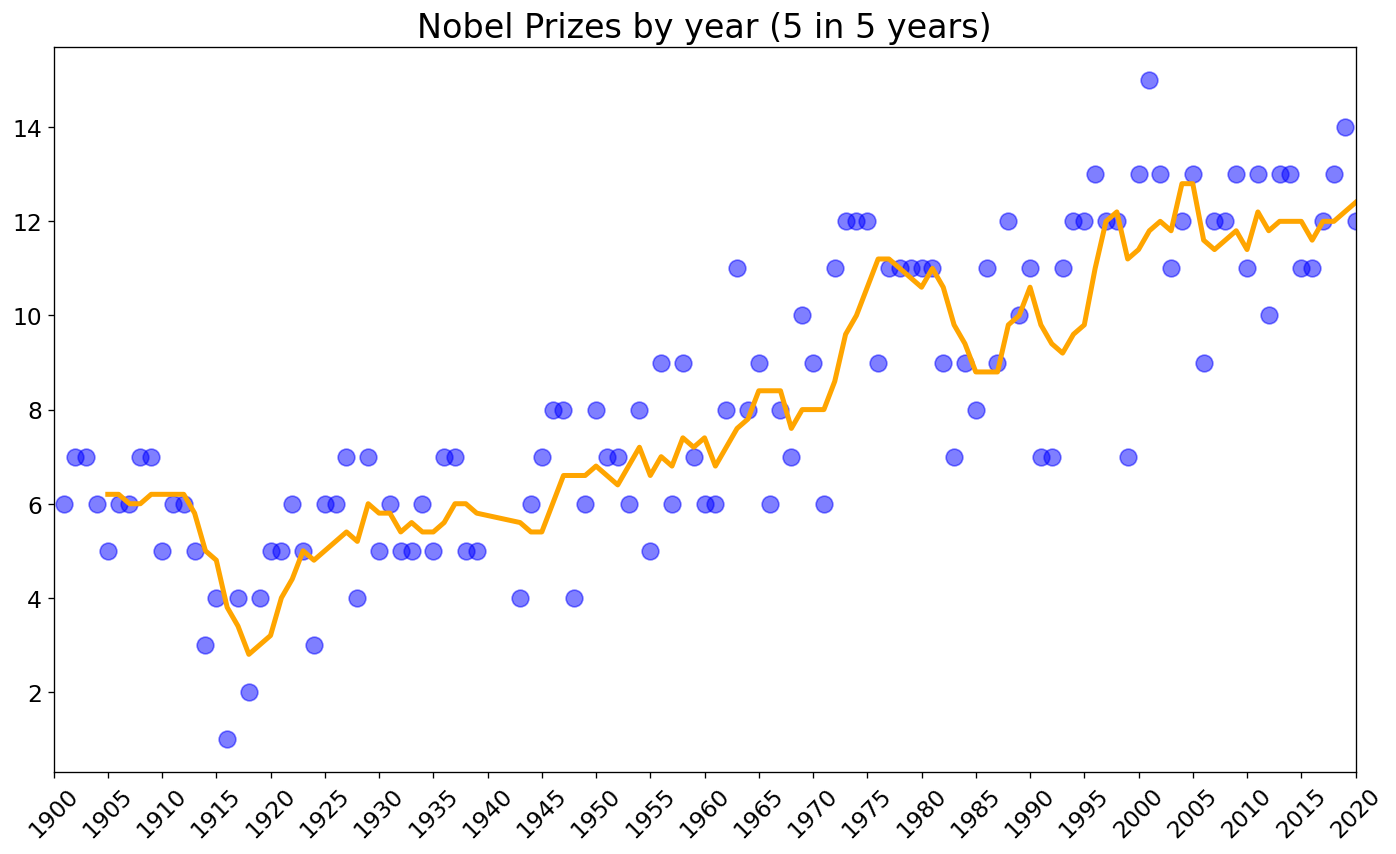

In [206]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Nobel Prizes by year (5 in 5 years)", fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45, ticks=np.arange(1900, 2021, step=5))

ax = plt.gca()
ax.set_xlim(1900, 2020)
ax.scatter(x=prizes_by_year.index, y=prizes_by_year.values, c="blue", alpha=0.5, s=100)
ax.plot(prizes_by_year.index, five_year_average.values, c="orange", linewidth=3)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [210]:
share_by_year = df_data.groupby(by="year").agg({"share_pct":pd.Series.mean})

In [212]:
share_five_year_average = share_by_year.rolling(window=5).mean()

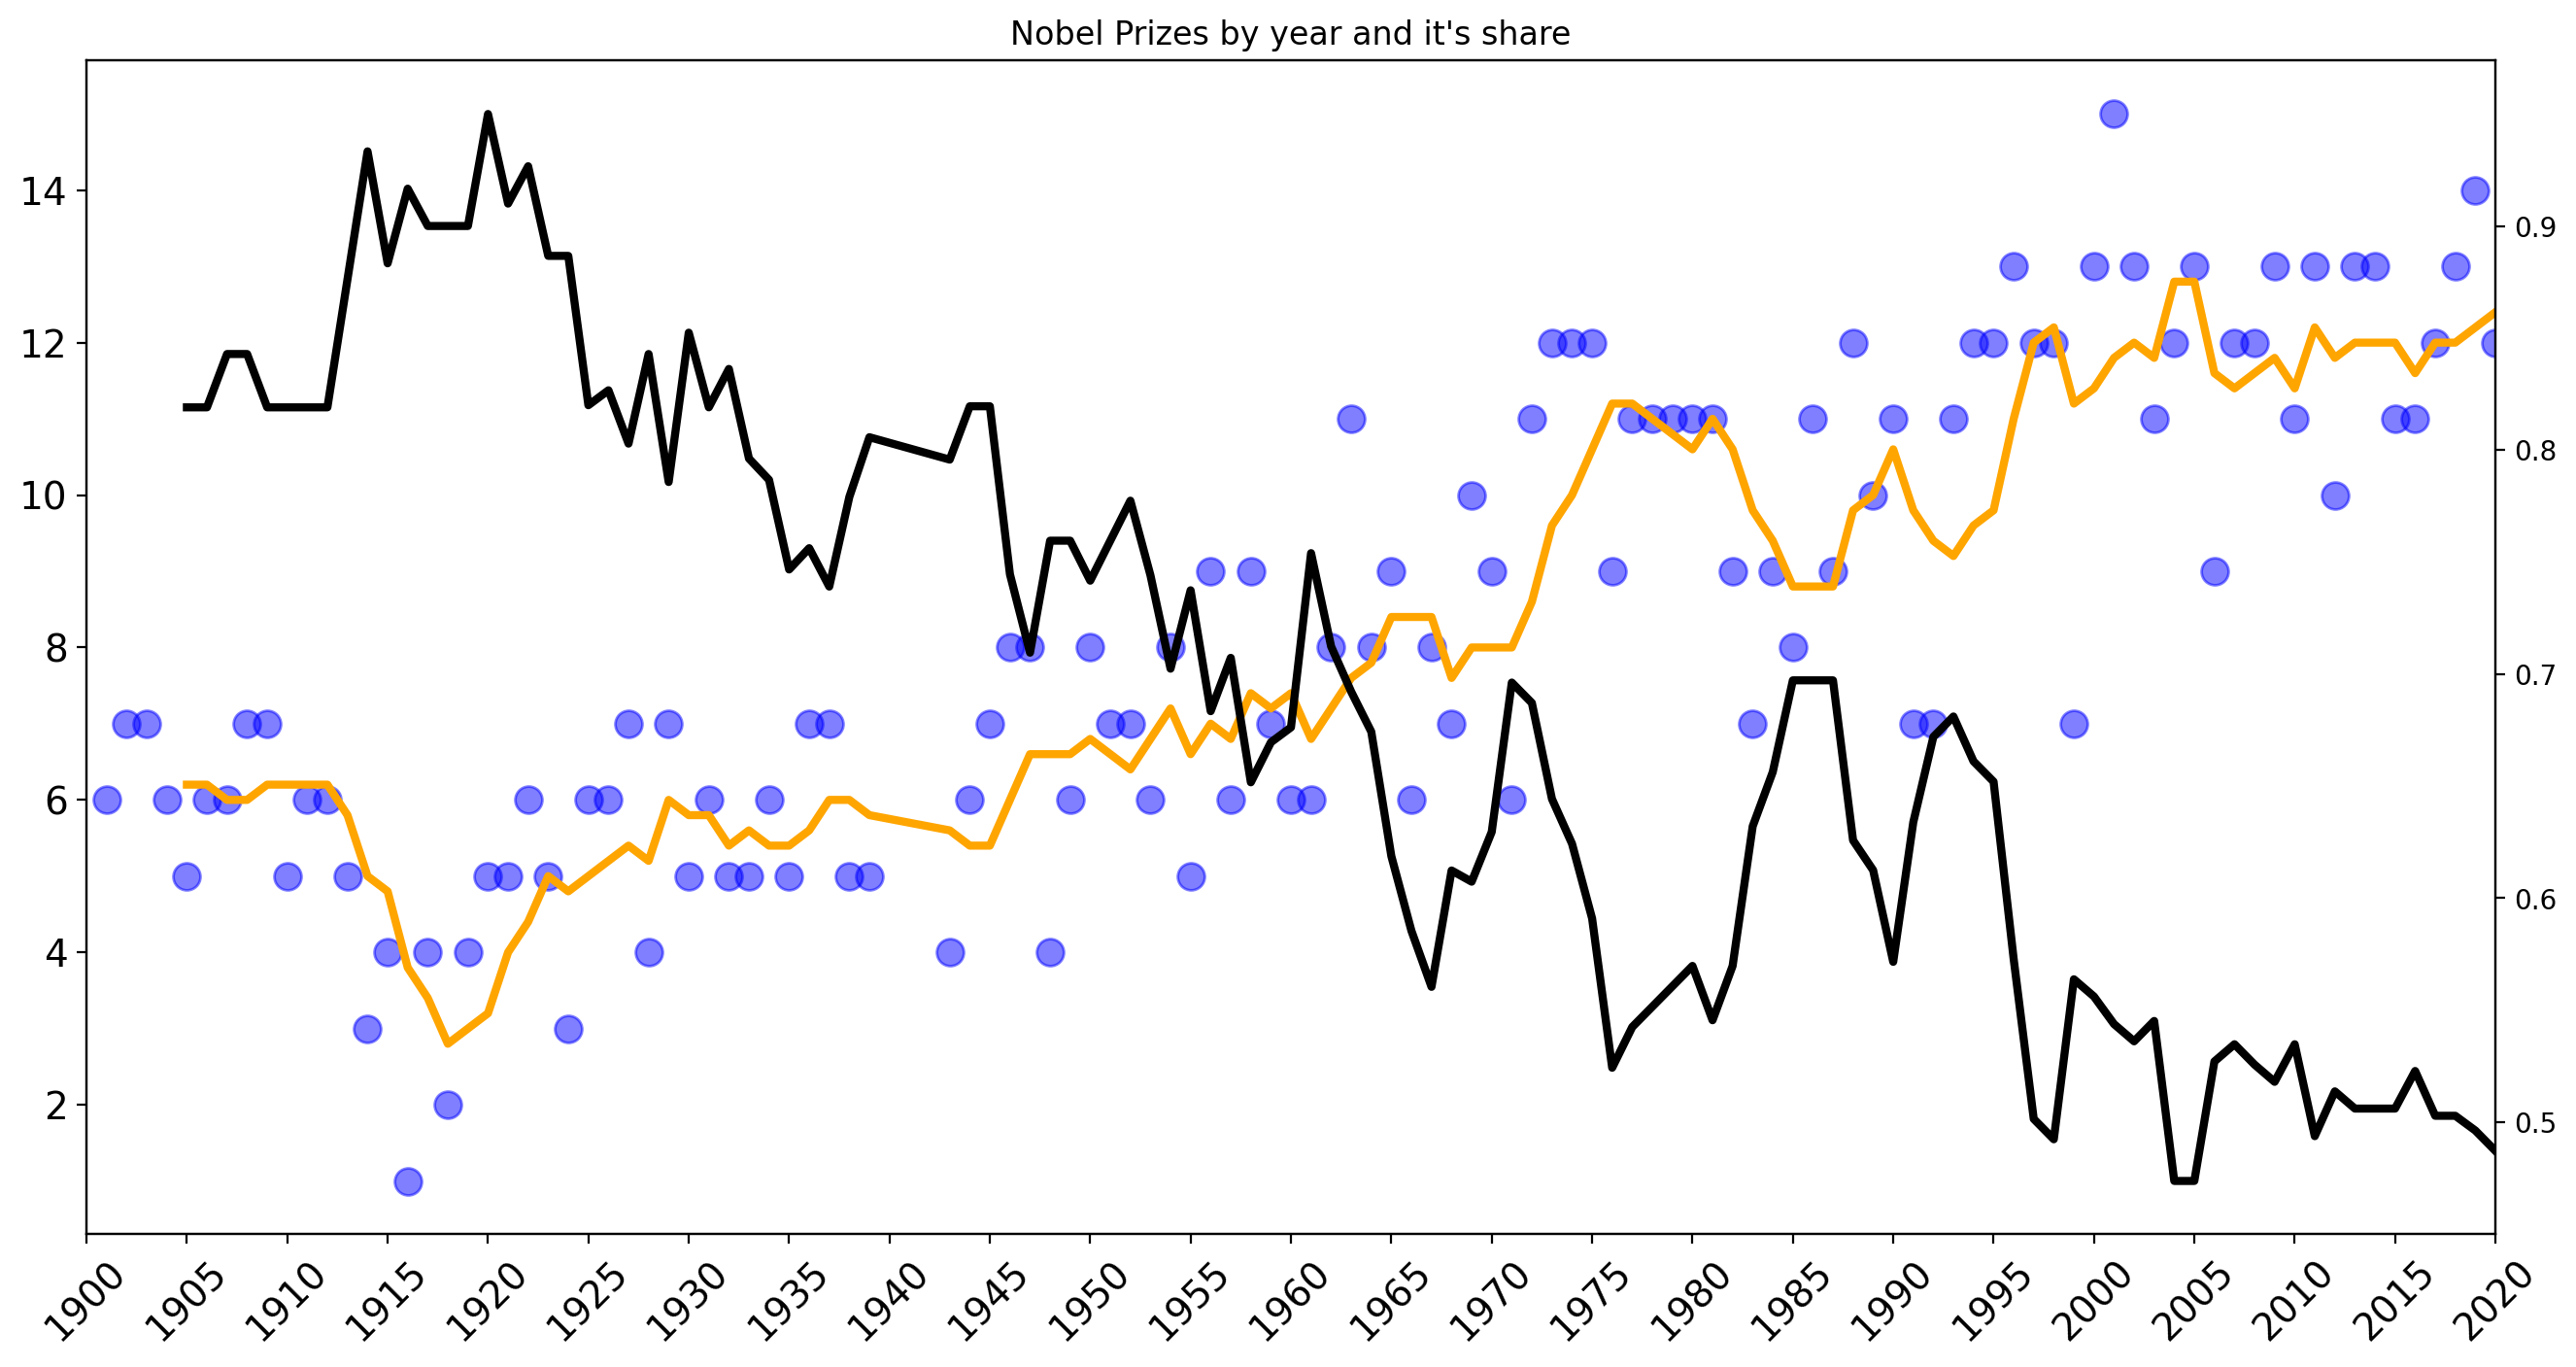

In [216]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Nobel Prizes by year and it's share", fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prizes_by_year.index, y=prizes_by_year.values, c="blue", alpha=0.5, s=100)

ax1.plot(prizes_by_year.index, five_year_average.values, c="orange", linewidth=3)

ax2.plot(prizes_by_year.index, share_five_year_average.values, c="black", linewidth=3)

plt.show()

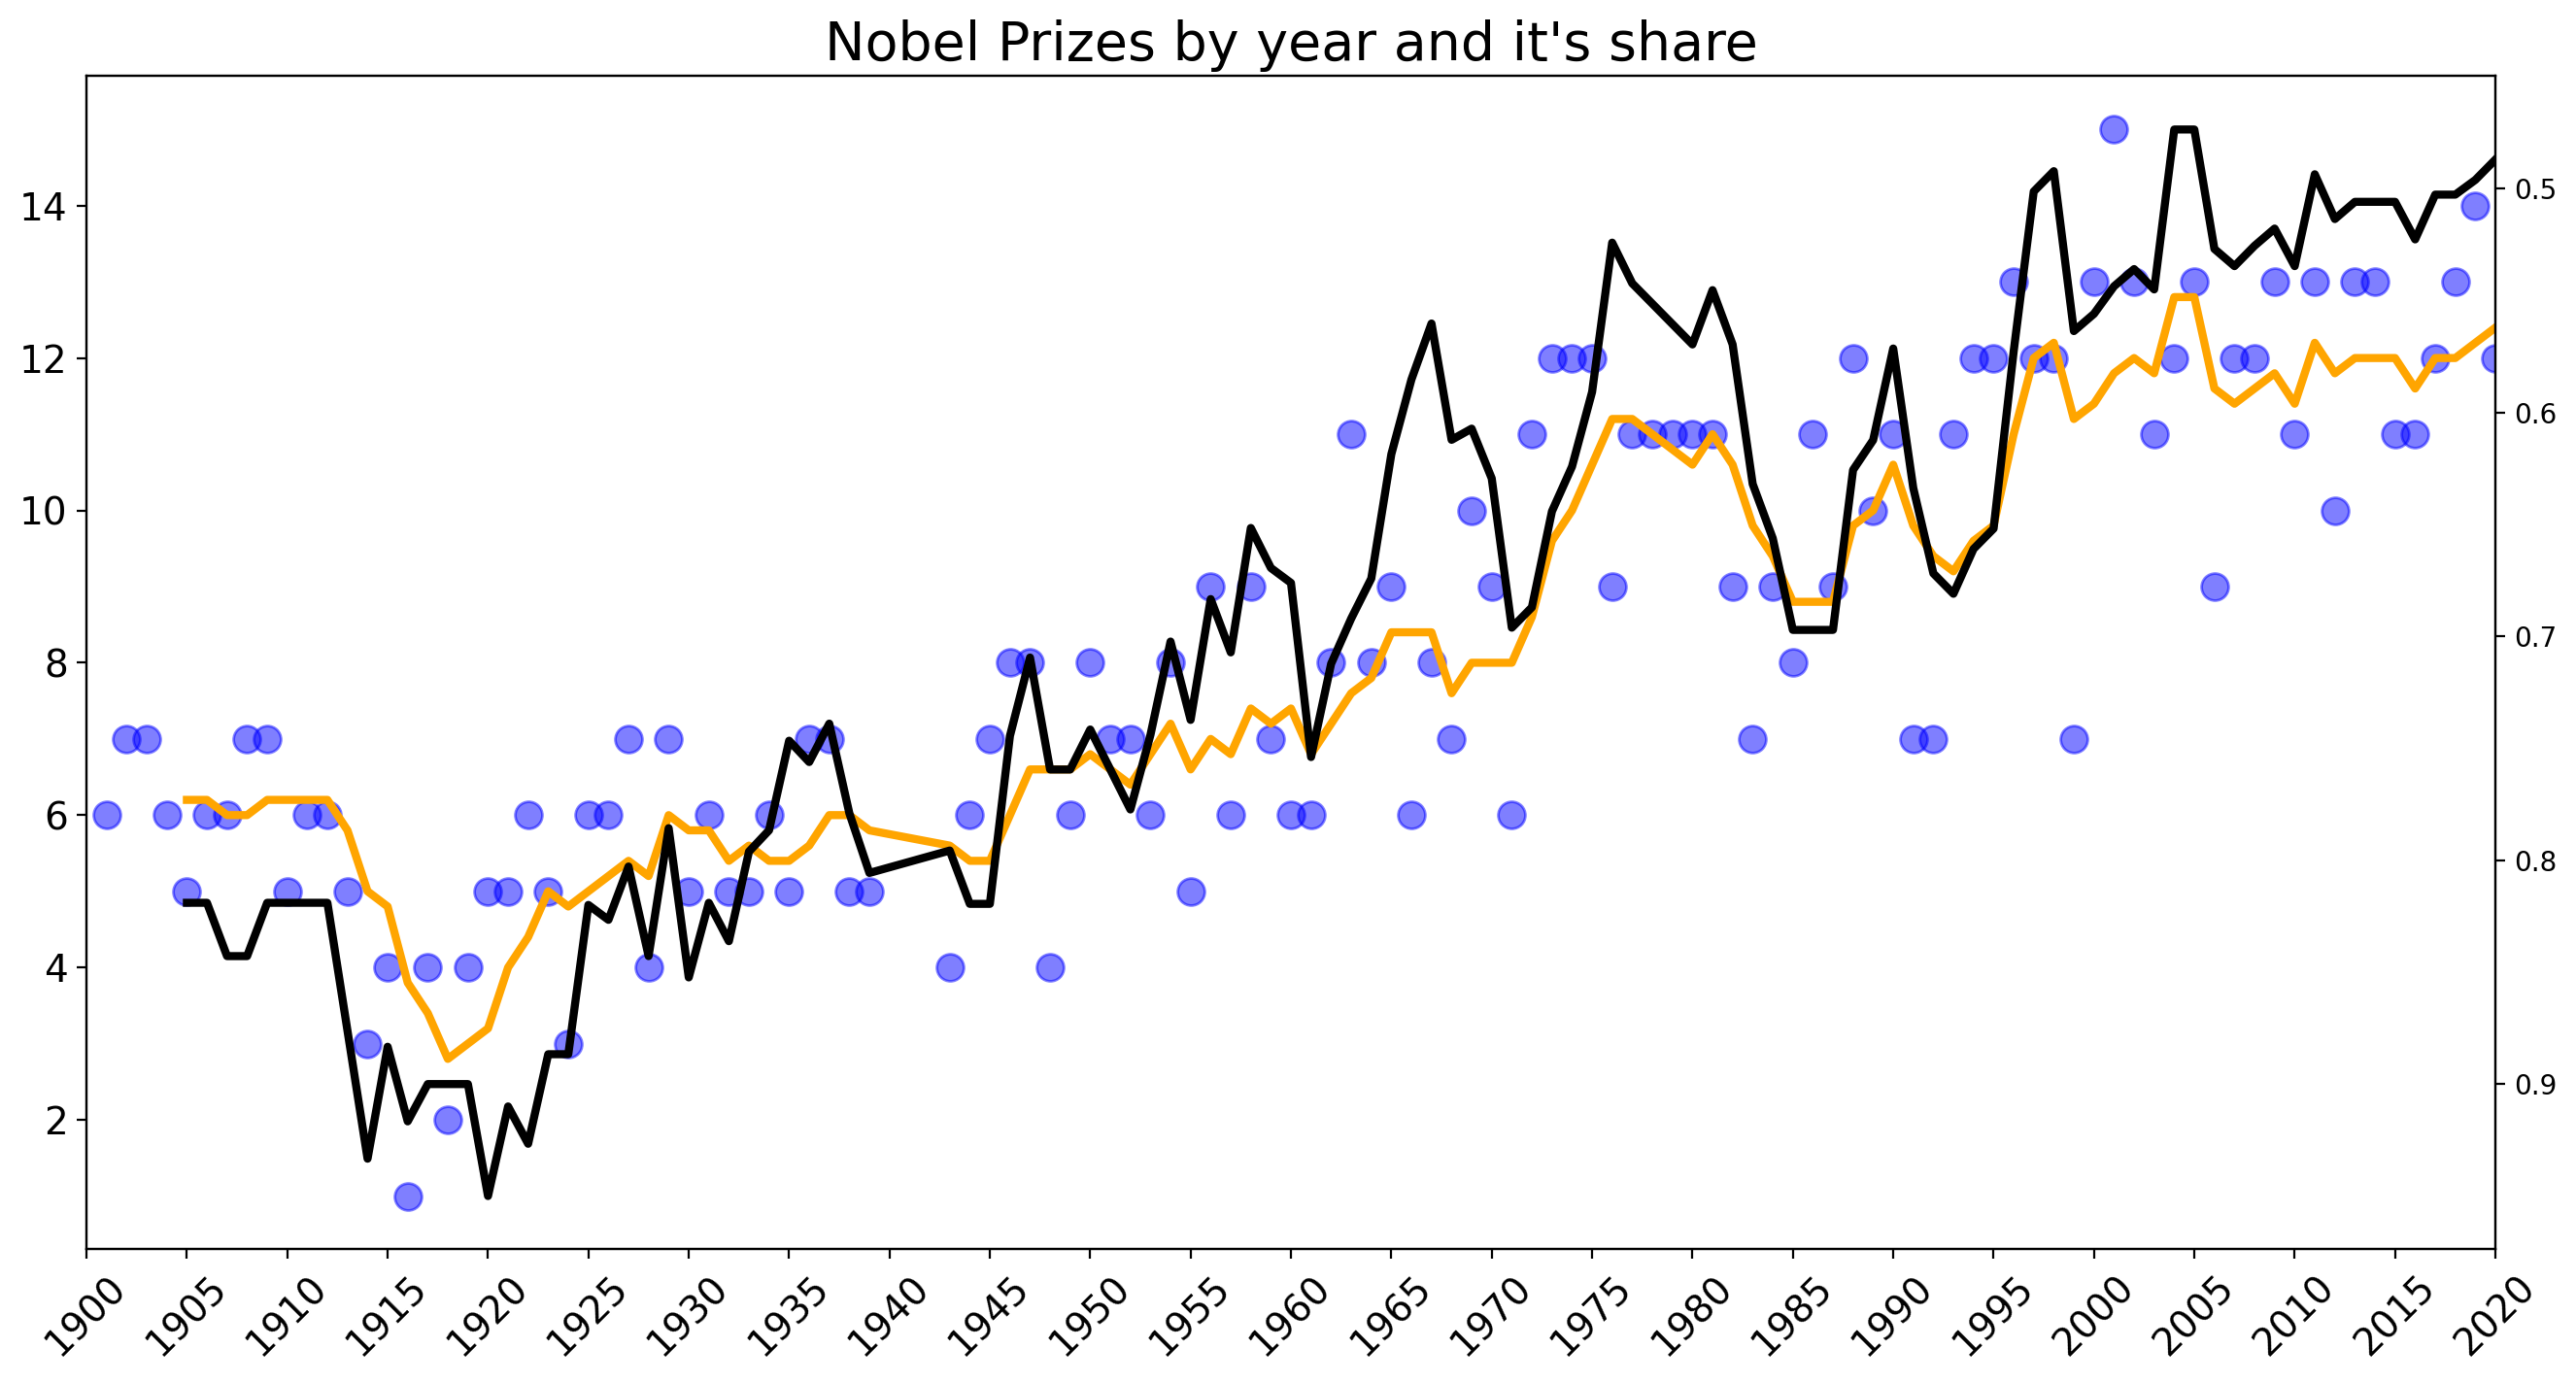

In [218]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Nobel Prizes by year and it's share", fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()

ax1.scatter(x=prizes_by_year.index, y=prizes_by_year.values, c="blue", alpha=0.5, s=100)

ax1.plot(prizes_by_year.index, five_year_average.values, c="orange", linewidth=3)

ax2.plot(prizes_by_year.index, share_five_year_average.values, c="black", linewidth=3)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [391]:
top_countries = df_data.groupby(["birth_country_current"], as_index=False).agg({"prize": pd.Series.count})
top_countries.sort_values(by="prize", inplace=True)
top20_countries = top_countries[-20:]
print(top20_countries)

       birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281


In [394]:
fig = px.bar(x=top20_countries.prize, y=top20_countries.birth_country_current, title="Top 20 Countries by Number of Prizes", orientation="h", labels={"y":"Country", "x":"Number of Prizes"}, color=top20_countries.prize, color_continuous_scale='Viridis')
fig.update_coloraxes(showscale=False)
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [396]:
df_countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize":pd.Series.count})

In [397]:
fig = px.choropleth(df_countries, locations="ISO", color="prize", hover_name=df_countries.birth_country_current, color_continuous_scale=px.colors.sequential.matter)
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [409]:
cat_country = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})
cat_country.sort_values(by="prize", ascending=False, inplace=True)
print(cat_country)

        birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]


In [402]:
merged_df = pd.merge(cat_country, top20_countries, on="birth_country_current")
merged_df.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]
merged_df.sort_values(by="total_prize", inplace=True)

In [412]:
fig = px.bar(x=merged_df.cat_prize, y=merged_df.birth_country_current, title="Top 20 Countries by Number of Prizes and Categories", orientation="h", labels={"y":"Country", "x":"Number of Prizes"}, color=merged_df.category)
fig.update_coloraxes(showscale=False)
fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [421]:
prize_by_year = df_data.groupby(by=["birth_country_current", "year"], as_index=False).count()
prize_by_year = prize_by_year.sort_values("year")[["year", "birth_country_current", "prize"]]

In [426]:
cumulative_prizes = prize_by_year.groupby(by=["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [427]:
l_chart = px.line(cumulative_prizes, x="year", y="prize", color="birth_country_current", hover_name="birth_country_current", labels={"prize":"Number of Prizes", "year":"Year"})
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [448]:
top_organizations = df_data.groupby(["organization_name"], as_index=False).agg({"prize":pd.Series.count})
top_organizations.sort_values(by="prize", inplace=True)
top20_organizations = top_organizations[-20:]
print(top20_organizations)

                                organization_name  prize
79                               Institut Pasteur      7
109                             London University      7
67                         Harvard Medical School      7
192                     University College London      7
40                             Cornell University      8
12                              Bell Laboratories      8
258                               Yale University      9
111           MRC Laboratory of Molecular Biology     10
222                          University of Oxford     12
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
146                          Princeton University     15
38                            Columbia University     17
26   California Institute of Technology (Caltech)     17
197                       University of Cambridge     18
198                         University of Chicago     20
117   Massachusetts Institute o

In [449]:
fig = px.bar(x=top20_organizations.prize, y=top20_organizations.organization_name, title="Top 20 Organizations by Number of Prizes", orientation="h", labels={"y":"Organization", "x":"Number of Prizes"}, color=top20_organizations.prize, color_continuous_scale='Viridis')
fig.update_coloraxes(showscale=False)
fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [450]:
top_organizations_cities = df_data.groupby(["organization_city"], as_index=False).agg({"prize":pd.Series.count})
top_organizations_cities.sort_values(by="prize", inplace=True)
top20_organizations_cities = top_organizations_cities[-20:]
print(top20_organizations_cities)

    organization_city  prize
65          Göttingen      8
186            Zurich      8
71         Heidelberg      9
119     New Haven, CT      9
110            Munich      9
23         Boston, MA      9
108            Moscow     10
157         Stockholm     10
126            Oxford     12
13             Berlin     12
129      Pasadena, CA     17
135     Princeton, NJ     19
39        Chicago, IL     20
12       Berkeley, CA     21
156      Stanford, CA     24
128             Paris     25
92             London     27
33          Cambridge     31
121      New York, NY     45
34      Cambridge, MA     50


In [456]:
fig = px.bar(x=top20_organizations_cities.prize, y=top20_organizations_cities.organization_city, title="Top 20 Organizations' Cities by Number of Prizes", orientation="h", labels={"y":"Organization", "x":"Number of Prizes"}, color=top20_organizations_cities.prize, color_continuous_scale='Viridis')
fig.update_coloraxes(showscale=False)
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [453]:
top_birthcities = df_data.groupby(["birth_city"], as_index=False).agg({"prize":pd.Series.count})
top_birthcities.sort_values(by="prize", inplace=True)
top20_birthcities = top_birthcities[-20:]
print(top20_birthcities)

                birth_city  prize
343          Milwaukee, WI      3
87                   Cairo      4
356               Montreal      4
428         Pittsburgh, PA      4
167  Frankfurt-on-the-Main      5
440                 Prague      5
515              Stockholm      6
210                Hamburg      6
363                 Munich      7
358                 Moscow      7
590         Washington, DC      8
64              Boston, MA      8
76            Brooklyn, NY      8
80                Budapest      8
48                  Berlin     11
112            Chicago, IL     12
572                 Vienna     14
313                 London     19
418                  Paris     26
382           New York, NY     53


In [457]:
fig = px.bar(x=top20_birthcities.prize, y=top20_birthcities.birth_city, title="Top 20 Laureates' Birth Cities by Number of Prizes", orientation="h", labels={"y":"Organization", "x":"Number of Prizes"}, color=top20_birthcities.prize, color_continuous_scale='Viridis')
fig.update_coloraxes(showscale=False)
fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [459]:
country_city_organization = df_data.groupby(by=["organization_country", "organization_city", "organization_name"], as_index=False).agg({"prize": pd.Series.count})
country_city_organization = country_city_organization.sort_values("prize", ascending=False)

In [460]:
figure = px.sunburst(country_city_organization, path=["organization_country", "organization_city", "organization_name"], values="prize", title="Where do Discoveries Take Place?")
figure.update_layout(xaxis_title="Number of Prizes", yaxis_title="City", coloraxis_showscale=False)

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 
